# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In [19]:
from platform import release

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [38]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

## Analizzo e pulisco i dati

In [39]:
print(list(oscar_df['category'].unique()))

['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY', 'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)', 'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE', 'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)', 'WRITING (Original Story)', 'WRITING (Title Writing)', 'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION', 'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD', 'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)', 'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS', 'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)', 'WRITING (Original Screenplay)', 'DOCUMENTARY (Short Subject)', 'MUSIC (Music Score of a Dramatic

In [40]:
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [23]:
duplicati = movies_df[movies_df.duplicated()]
duplicati

,id,name,date,tagline,description,minute,rating


In [25]:
prova = movies_df.loc[movies_df['name']=='The Last Command']
prova

,id,name,date,tagline,description,minute,rating
12303,1012304,The Last Command,1928.0,NaN,A former Imperial Russian general and cousin o...,88.0,3.97
74709,1074710,The Last Command,1955.0,THE BUGLE SOUNDS... No Mercy! No Quarter! for ...,During the Texas War of Independence of 1836 A...,110.0,3.19


In [26]:
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [31]:
num = oscar_df['film'].isna().sum()
print(num)


319


## Quale paese ha vinto più oscar?
* Seleziono i vincitori di un Oscar
* Cerco tra i film vincitori chi ha una corrispondenza in movies_df secondo il nome e la data del film
* Cerco per ogni film vincitore il paese corrispondente

In [27]:
oscar_win_df=oscar_df.loc[oscar_df['winner']==True]
oscar_win_df

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...,...
10880,2023,2024,96,WRITING (Original Screenplay),Screenplay - Justine Triet and Arthur Harari,Anatomy of a Fall,True
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [28]:
oscar_win_df = pd.merge(oscar_win_df, movies_df, left_on=['film','year_film'], right_on=['name','date'], how='inner')
oscar_win_df

,year_film,year_ceremony,ceremony,category,name_x,film,winner,id,name_y,date,tagline,description,minute,rating
0,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,1011901,7th Heaven,1927.0,NaN,A dejected Parisian sewer worker feels his pra...,110.0,3.75
1,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True,1041593,Two Arabian Knights,1927.0,NaN,"During World War I, two American soldiers figh...",92.0,3.29
2,1927,1928,1,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True,1011901,7th Heaven,1927.0,NaN,A dejected Parisian sewer worker feels his pra...,110.0,3.75
3,1927,1928,1,ENGINEERING EFFECTS,Roy Pomeroy,Wings,True,1005482,Wings,1927.0,"Youth, hitting the clouds! Laughing at danger!...","Two young men, one rich, one middle class, bot...",144.0,3.74
4,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True,1005482,Wings,1927.0,"Youth, hitting the clouds! Laughing at danger!...","Two young men, one rich, one middle class, bot...",144.0,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,2023,2024,96,SHORT FILM (Live Action),Wes Anderson and Steven Rales,The Wonderful Story of Henry Sugar,True,1000576,The Wonderful Story of Henry Sugar,2023.0,NaN,A rich man learns about a guru who can see wit...,39.0,3.84
1933,2023,2024,96,SOUND,Tarn Willers and Johnnie Burn,The Zone of Interest,True,1000215,The Zone of Interest,2023.0,NaN,"The commandant of Auschwitz, Rudolf Höss, and ...",105.0,3.88
1934,2023,2024,96,VISUAL EFFECTS,"Takashi Yamazaki, Kiyoko Shibuya, Masaki Takah...",Godzilla Minus One,True,1000367,Godzilla Minus One,2023.0,Postwar Japan. From zero to minus.,"In postwar Japan, a new terror rises. Will the...",125.0,4.12
1935,2023,2024,96,WRITING (Adapted Screenplay),Written for the screen by Cord Jefferson,American Fiction,True,1000456,American Fiction,2023.0,NaN,Thelonious “Monk” Ellison's writing career has...,117.0,3.72


In [34]:
oscar_win_df = oscar_win_df[['id','name_y','date','minute','rating','category','name_x','winner']].copy()
oscar_win_df = oscar_win_df.set_index('id')
oscar_win_df

,name_y,date,minute,rating,category,name_x,winner
id,,,,,,,
1011901,7th Heaven,1927.0,110.0,3.75,ACTRESS,Janet Gaynor,True
1041593,Two Arabian Knights,1927.0,92.0,3.29,DIRECTING (Comedy Picture),Lewis Milestone,True
1011901,7th Heaven,1927.0,110.0,3.75,DIRECTING (Dramatic Picture),Frank Borzage,True
1005482,Wings,1927.0,144.0,3.74,ENGINEERING EFFECTS,Roy Pomeroy,True
1005482,Wings,1927.0,144.0,3.74,OUTSTANDING PICTURE,Paramount Famous Lasky,True
...,...,...,...,...,...,...,...
1000576,The Wonderful Story of Henry Sugar,2023.0,39.0,3.84,SHORT FILM (Live Action),Wes Anderson and Steven Rales,True
1000215,The Zone of Interest,2023.0,105.0,3.88,SOUND,Tarn Willers and Johnnie Burn,True
1000367,Godzilla Minus One,2023.0,125.0,4.12,VISUAL EFFECTS,"Takashi Yamazaki, Kiyoko Shibuya, Masaki Takah...",True


In [36]:
oscar_win_df = pd.merge(oscar_win_df, countries_df, left_on='id', right_on='id', how='inner')
oscar_win_df

,id,name_y,date,minute,rating,category,name_x,winner,country
0,1011901,7th Heaven,1927.0,110.0,3.75,ACTRESS,Janet Gaynor,True,USA
1,1041593,Two Arabian Knights,1927.0,92.0,3.29,DIRECTING (Comedy Picture),Lewis Milestone,True,USA
2,1011901,7th Heaven,1927.0,110.0,3.75,DIRECTING (Dramatic Picture),Frank Borzage,True,USA
3,1005482,Wings,1927.0,144.0,3.74,ENGINEERING EFFECTS,Roy Pomeroy,True,USA
4,1005482,Wings,1927.0,144.0,3.74,OUTSTANDING PICTURE,Paramount Famous Lasky,True,USA
...,...,...,...,...,...,...,...,...,...
2587,1000215,The Zone of Interest,2023.0,105.0,3.88,SOUND,Tarn Willers and Johnnie Burn,True,UK
2588,1000215,The Zone of Interest,2023.0,105.0,3.88,SOUND,Tarn Willers and Johnnie Burn,True,USA
2589,1000367,Godzilla Minus One,2023.0,125.0,4.12,VISUAL EFFECTS,"Takashi Yamazaki, Kiyoko Shibuya, Masaki Takah...",True,Japan
2590,1000456,American Fiction,2023.0,117.0,3.72,WRITING (Adapted Screenplay),Written for the screen by Cord Jefferson,True,USA


In [42]:
conteggi = oscar_win_df['country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  # Rinomina le colonne

conteggi_df

,country,count
0,USA,1684
1,UK,348
2,France,113
3,Germany,60
4,Canada,50
5,Italy,39
6,India,30
7,New Zealand,25
8,Australia,22
9,Japan,18


In [50]:
world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')
 

<bound method NDFrame.head of           featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI     

<Axes: >

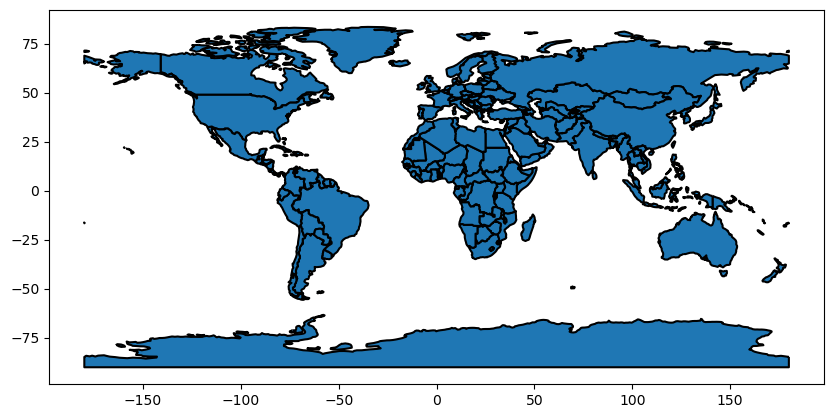

In [53]:
world.plot(edgecolor='black', linewidth=1.5, figsize=(10,8))

## Chi ha prodotto più film?

## La bellezza di un film, può essere influenzata dalla durata?

## Nel tempo come si è evoluta la durata media dei film?